# Visualize simulation result and generate report (pdf)

## import libraries

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from mpl_toolkits.mplot3d import Axes3D
import yaml
import os


## choose path under directory /result

In [511]:
timestamp = "2023-05-06_17-17-56"
path = f"result/{timestamp}"

## Load simulation parameters from params.yaml

In [512]:
with open(f"{path}/params.yaml") as f:
    params = yaml.safe_load(f)

params["crystal"]

{'num_axes': 2,
 'name': 'YbYLF',
 'T': 300,
 'index_1': 1.45,
 'index_2': 1.47,
 'index_3': None,
 'doping_level': 10.0,
 'cation_density': '1.4e22',
 'caxis': [1.0, 0.0, 0.0],
 'baxis': None,
 'shape': 'cuboid',
 'W': 2.5,
 'H': 2.5,
 'L': 7.5,
 'QE': 1.0,
 'alpha_b': 0.0}

## Load csv file

In [513]:
file_list = os.listdir(path)
csv = [f for f in file_list if ".csv" in f]
if len(csv) != 1:
    print("No csv file or more than two csv files!")
df = pd.read_csv(f"{path}/{csv[0]}")

In [514]:
df

,λgen,λesc,ref_N,x0,y0,z0,x,y,z,kx,ky,kz
0,981.215825,1021.852071,2,1.022598,1.316146,1.002419,0.741550,2.500000e+00,6.566659e+00,0.847572,0.380931,0.369478
1,988.794230,988.794230,0,1.140557,1.185644,1.642651,0.122843,2.343909e+00,7.291228e-09,-0.655012,0.745472,-0.123415
2,1021.364101,991.914102,1,1.302015,1.199700,0.443217,0.238508,1.860778e+00,9.064265e-09,-0.447483,0.418122,-0.790527
3,966.107152,976.120033,0,1.678139,1.540080,5.296469,2.122829,9.326197e-09,4.675907e+00,-0.226499,-0.852180,0.471685
4,986.740550,999.296315,1,1.130609,1.141828,3.872793,1.941967,1.358063e+00,7.500000e+00,0.280809,-0.438742,0.853611
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1028.299889,991.100304,16,1.297619,1.280531,0.882099,1.397324,4.693517e-01,9.807006e-09,-0.173787,-0.223984,-0.958973
99996,1007.512314,1026.424351,0,1.156857,1.292017,4.876319,2.500000,1.061154e+00,5.949874e+00,0.397100,-0.192952,0.897263
99997,1022.687549,1022.687549,0,1.274416,1.309598,4.427268,1.350782,1.957248e+00,7.500000e+00,0.035252,0.298963,0.953613
99998,993.231472,993.231472,0,1.250787,1.270235,2.755248,1.260165,9.349827e-09,2.273465e+00,0.010009,-0.857607,-0.514208


In [515]:
mean_gen = df["λgen"].mean()
err_gen = df["λgen"].std() / np.sqrt(len(df))
mean_esc = df["λesc"].mean()
err_esc = df["λesc"].std() / np.sqrt(len(df))
N = int(float(params["simulation"]["N"]))
Nesc = df.shape[0]
escape_eff = Nesc / N
print(f"Generated: {mean_gen:.2f} +- {err_gen:.2f}")
print(f"Escaped: {mean_esc:.2f} +- {err_esc:.2f}")
print(f"Escaping rays: {Nesc} / {N} => {escape_eff * 100}%")

Generated: 994.85 +- 0.08
Escaped: 1001.90 +- 0.08
Escaping rays: 100000 / 100000 => 100.0%


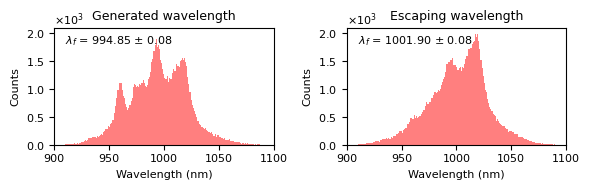

In [516]:
TITLE_FONT_SIZE = 9
LABEL_FONT_SIZE = 8
TICKS_FONT_SIZE = 8
TEXT_FONT_SIZE = 8

wl_min = 900
wl_max = 1100
fig1, ax1 = plt.subplots(1, 2, figsize=(6, 2))
ax1[0].set_title("Generated wavelength", fontsize=TITLE_FONT_SIZE)
ax1[0].hist(df["λgen"], range = (wl_min, wl_max), bins=wl_max - wl_min + 1,  color="red", alpha=0.5, label="generated")
ax1[1].set_title("Escaping wavelength", fontsize=TITLE_FONT_SIZE)
ax1[1].hist(df["λesc"], range = (900, 1100), bins=200,  color="red", alpha=0.5, label="escaped")
for a in ax1:
    a.set_xlabel("Wavelength (nm)", fontsize=LABEL_FONT_SIZE)
    a.set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
    a.set_xlim(wl_min, wl_max)
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    ymax = max(ax1[0].get_ylim()[1], ax1[1].get_ylim()[1])
    a.set_ylim(0, ymax)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)
ax1[0].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_gen:.2f} $\pm$ {err_gen:.2f}", transform=ax1[0].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
ax1[1].text(x=0.05, y=0.95, s=f"$\lambda_f$ = {mean_esc:.2f} $\pm$ {err_esc:.2f}", transform=ax1[1].transAxes, verticalalignment="top", fontsize=TEXT_FONT_SIZE)
fig1.tight_layout()
plt.show()

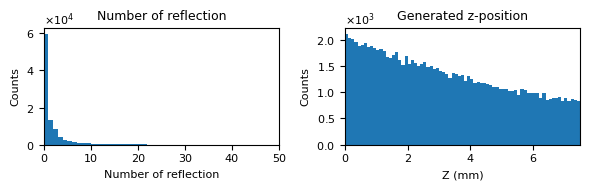

In [517]:
Nref_max = 50

fig2, ax2 = plt.subplots(1, 2, figsize=(6, 2))
ax2[0].hist(df["ref_N"], bins=np.arange(0, Nref_max + 1))
ax2[0].set_title("Number of reflection", fontsize=TITLE_FONT_SIZE)
ax2[0].set_xlabel("Number of reflection", fontsize=LABEL_FONT_SIZE)
ax2[0].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
ax2[0].set_xlim(0, Nref_max)

ax2[1].hist(df["z0"], bins=np.arange(0, params["crystal"]["L"] + 0.1, 0.1))
ax2[1].set_title("Generated z-position", fontsize=TITLE_FONT_SIZE)
ax2[1].set_xlabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
ax2[1].set_ylabel("Counts", fontsize=LABEL_FONT_SIZE)
if params["crystal"]["shape"] == "cuboid":
    ax2[1].set_xlim(0, params["crystal"]["L"])
elif params["crystal"]["shape"] == "brewster":
    ax2[1].set_xlim(0, params["crystal"]["L"]*1.1)

for a in ax2:
    a.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    a.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True))
    a.ticklabel_format(style='sci',axis='y',scilimits=(0,0))
    a.yaxis.offsetText.set_fontsize(TICKS_FONT_SIZE)

fig2.tight_layout()
plt.show()

## 3D visualization

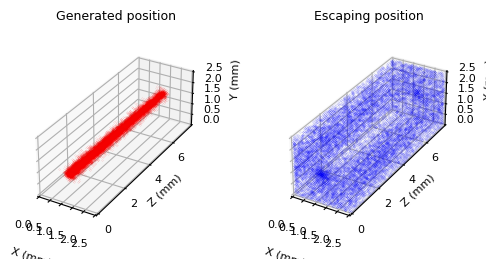

In [518]:
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]

if df.shape[0] > 20000:
    df = df.iloc[:20000]

fig3 = plt.figure(figsize=(6, 3))
ax3_1 = fig3.add_subplot(121, projection="3d")
ax3_2 = fig3.add_subplot(122, projection="3d")
# fig3.subplots_adjust(left=0.05, bottom=0.15, right=0.8, top=0.9, wspace=0.0)

ax3_1.set_title("Generated position", fontsize=TITLE_FONT_SIZE)
ax3_2.set_title("Escaping position", fontsize=TITLE_FONT_SIZE)
ax3_1.plot(xs=df.x0, ys=df.z0, zs=df.y0, ls="None", marker=".", markersize=0.2, alpha=0.5, color="red")
ax3_2.plot(xs=df.x, ys=df.z, zs=df.y, ls="None", marker=".", markersize=0.2, alpha=0.5, color="blue")
ratio_y = H / W
ratio_z = L / W

for ax in [ax3_1, ax3_2]:
    ax.set_xlim(0, W)
    if params["crystal"]["shape"] == "cuboid":
        ax.set_ylim(0, L)
    elif params["crystal"]["shape"] == "brewster":
        ax.set_ylim(0, L*1.25)
    ax.set_zlim(0, H)
    ax.set_xlabel("X (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_ylabel("Z (mm)", fontsize=LABEL_FONT_SIZE)
    ax.set_zlabel("Y (mm)", fontsize=LABEL_FONT_SIZE)
    ax.tick_params(axis="both", which="major", labelsize=TICKS_FONT_SIZE)
    # ax.set_aspect("equal")

ax3_1.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
ax3_2.set_box_aspect((np.ptp(df.x), np.ptp(df.x * ratio_z), np.ptp(df.x * ratio_y)))
# fig3.tight_layout()
plt.show()

## generate report pdf

In [519]:
from io import BytesIO
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4, portrait
from reportlab.lib.units import mm
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg

In [520]:
file = f"{path}/report.pdf"
paper = canvas.Canvas(file, pagesize=portrait(A4))

# timestamp
paper.setFont("Helvetica", 11)
paper.drawString(15 * mm, 280 * mm, f"{timestamp}")

# parameters
paper.setFont("Helvetica", 11)

# load parameters
step = params["simulation"]["step"]
Nref_max = params["simulation"]["max_ref_count"]
if Nref_max == 0:
    Nref_max = "Inf"
pump_depletion = params["simulation"]["pump_depletion"]

name = params["crystal"]["name"]
temperature = params["crystal"]["T"]
n1 = params["crystal"]["index_1"]
n2 = params["crystal"]["index_2"]
n3 = params["crystal"]["index_3"]
doping_level = params["crystal"]["doping_level"]
W = params["crystal"]["W"]
H = params["crystal"]["H"]
L = params["crystal"]["L"]
shape = params["crystal"]["shape"]
caxis = params["crystal"]["caxis"]
baxis = params["crystal"]["baxis"]
QE = params["crystal"]["QE"]
alpha_b = params["crystal"]["alpha_b"]

dist = params["beam"]["distribution"]
d = params["beam"]["d"]
wl = params["beam"]["wl"]
k = params["beam"]["k"]
p0 = params["beam"]["p0"]
E = params["beam"]["E"]

paper.drawString(15 * mm, 270 * mm, f"Simulation: N={N}, step size={step} mm, max ref. count={Nref_max}, pump depletion={pump_depletion}")
paper.drawString(15 * mm, 260 * mm, "Crystal:")
paper.drawString(30 * mm, 260 * mm, f"{name}, {doping_level}%, W={W}, H={H}, L={L} (mm), {temperature} K, {shape}, caxis={caxis}, baxis={baxis},")
paper.drawString(30 * mm, 255 * mm, f"n1={n1}, n2={n2}, n3={n3}, quantum efficiency={QE}, background absorption={alpha_b} cm^-1")
paper.drawString(15 * mm, 245 * mm, "Beam:")
paper.drawString(30 * mm, 245 * mm, f"{dist}, diameter={d} mm, wavelength={wl} nm, k-vector={k},")
paper.drawString(30 * mm, 240 * mm, f"p0={p0}, polarization={E}")

paper.drawString(50 * mm, 230 * mm, f"Escaping rays: {Nesc} / {N} => Escape efficiency={escape_eff * 100}%")
paper.drawString(50 * mm, 225 * mm, f"External quantum efficiency: {escape_eff * QE * 100}%")

imgdata1 = BytesIO()
fig1.savefig(imgdata1, format="svg")
imgdata1.seek(0)
imgdata2 = BytesIO()
fig2.savefig(imgdata2, format="svg")
imgdata2.seek(0)
imgdata3 = BytesIO()
fig3.savefig(imgdata3, format="svg")
imgdata3.seek(0)

drawing1=svg2rlg(imgdata1)
drawing2=svg2rlg(imgdata2)
drawing3=svg2rlg(imgdata3)

renderPDF.draw(drawing1, paper, 10 * mm, 155 * mm)
renderPDF.draw(drawing2, paper, 10 * mm, 95 * mm)
renderPDF.draw(drawing3, paper, 10 * mm, 0 * mm)

paper.save()